In [2]:
# make sure ipython inline mode is activated
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np
datafile = '../numpy/trees.txt'

In [4]:
girths = []
heights = []
volumes = []

with open(datafile, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    
    # skip the first line
    
    for row in reader:
        girths.append(eval(row['Girth']))
        heights.append(eval(row['Height']))
        volumes.append(eval(row['Volume']))

In [8]:
!head ../numpy/trees.txt

Index	Girth	Height	Volume
1	8.3	70	10.3
2	8.6	65	10.3
3	8.8	63	10.2
4	10.5	72	16.4
5	10.7	81	18.8
6	10.8	83	19.7
7	11	66	15.6
8	11	75	18.2
9	11.1	80	22.6


In [5]:
np_data = np.array([girths, heights, volumes])

In [6]:
np_data.shape

(3, 31)

In [9]:
np_data = np_data.transpose()

In [10]:
np_data.shape

(31, 3)

In [11]:
np_data[0:4]

array([[ 8.3, 70. , 10.3],
       [ 8.6, 65. , 10.3],
       [ 8.8, 63. , 10.2],
       [10.5, 72. , 16.4]])

In [16]:
X = np_data

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
print X_pca.shape

(31, 2)


In [20]:
X_pca[:10]

array([[-21.28283382,   0.81468587],
       [-22.43991009,   5.68781729],
       [-22.98411967,   7.62144283],
       [-14.59159157,   0.47325738],
       [-10.08867225,  -7.68150126],
       [ -8.72837023,  -9.40465212],
       [-16.71891348,   6.15054222],
       [-12.06025983,  -1.97659888],
       [ -6.63416961,  -5.80576109],
       [-10.40288646,  -1.56911472]])

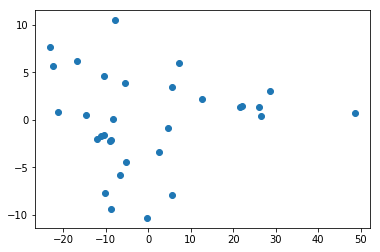

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:,1])

In [13]:
X.shape

(31, 3)

In [22]:
from sklearn.cluster import KMeans
from numpy.random import RandomState


kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
import numpy as np
np.round(kmeans.cluster_centers_, decimals=2)

array([[11.88, 74.54, 22.66],
       [17.94, 81.  , 55.93]])

In [34]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

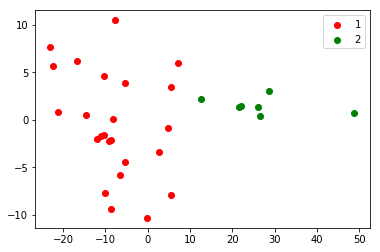

In [25]:
plot_2D(X_pca, kmeans.labels_, range(0,10))

In [53]:
import pickle
fp = open("iris_data.pkl", 'rb')
data = pickle.load(fp, encoding="bytes")

print type(data)

In [50]:
data[0:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [54]:
# create a list
my_list = list(range(0, 100))

print my_list
# It is not require to put .pkl extension
# it is for us to keep it clean and organized
# we can see that this is a pickle file



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
fp = open('list_dump.pkl', 'wb')


# lets dump it using pickle
pickle.dump(my_list, fp)

# close the file
fp.close()